In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns',30)

In [2]:
df = pd.read_csv('2004-2019.tsv',sep = '\t')

In [3]:
df.head()

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


In [4]:
df['PRODUTO'].value_counts()

ÓLEO DIESEL         21194
GASOLINA COMUM      21194
GLP                 21186
ETANOL HIDRATADO    21102
GNV                 13034
ÓLEO DIESEL S10      9113
Name: PRODUTO, dtype: int64

# Fazer o estudo soh pra diesel

In [5]:
diesel = df[df['PRODUTO']=='ÓLEO DIESEL'].copy()

In [6]:
diesel.head()

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
43547,43547,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ÓLEO DIESEL,125,R$/l,1.447,0.031,1.350,1.490,0.198,0.021,1.249,0.012,1.2153,1.2817,0.01,5,2004
43548,43548,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ÓLEO DIESEL,373,R$/l,1.437,0.059,1.300,1.660,0.157,0.041,1.28,0.024,1.2119,1.3801,0.019,5,2004
43549,43549,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ÓLEO DIESEL,190,R$/l,1.600,0.061,1.460,1.790,0.195,0.038,1.405,0.06,1.22,1.549,0.043,5,2004
43550,43550,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ÓLEO DIESEL,157,R$/l,1.526,0.045,1.399,1.659,0.163,0.029,1.363,0.022,1.3055,1.4407,0.016,5,2004
43551,43551,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ÓLEO DIESEL,105,R$/l,1.362,0.025,1.310,1.450,0.146,0.018,1.216,0.02,1.1768,1.272,0.016,5,2004


### Validacao

In [7]:
diesel['DATA INICIAL'] = pd.to_datetime(diesel['DATA INICIAL'])
diesel['DATA FINAL'] = pd.to_datetime(diesel['DATA FINAL'])

In [8]:
(diesel['DATA FINAL'] - diesel['DATA INICIAL']).value_counts()

6 days    21194
dtype: int64

### Deparar treino e teste

In [9]:
diesel_treino = diesel[diesel['DATA FINAL']<'2011-01-01']
diesel_teste = diesel[diesel['DATA FINAL']>='2011-01-01']

In [10]:
diesel_treino.shape,diesel_teste.shape

((9233, 21), (11961, 21))

### Baseline

Para series temporais, uma boa base line eh apenas supor que o preco da semana corrente corresponde ao preco da semana anterior

In [11]:
y_treino =  diesel_treino['PREÇO MÉDIO REVENDA']
y_teste = diesel_teste['PREÇO MÉDIO REVENDA']

In [12]:
bl_treino = diesel_treino.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].shift(1)
bl_teste = diesel_teste.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].shift(1)

In [13]:
diesel_treino['baseline'] = bl_treino

C:\Users\lucaskenjis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
diesel_treino[diesel_treino['ESTADO'] == 'SAO PAULO'].head(10)

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO,baseline
43570,43570,2004-05-09,2004-05-15,SUDESTE,SAO PAULO,ÓLEO DIESEL,3196,R$/l,1.368,0.057,1.210,1.590,0.158,0.042,1.21,0.026,1.141,1.369,0.021,5,2004,NaN
43597,43597,2004-05-16,2004-05-22,SUDESTE,SAO PAULO,ÓLEO DIESEL,3201,R$/l,1.368,0.057,1.239,1.599,0.158,0.042,1.21,0.026,1.125,1.369,0.021,5,2004,1.368
43624,43624,2004-05-23,2004-05-29,SUDESTE,SAO PAULO,ÓLEO DIESEL,3216,R$/l,1.368,0.057,1.220,1.590,0.159,0.042,1.209,0.025,1.125,1.369,0.021,5,2004,1.368
43651,43651,2004-05-30,2004-06-05,SUDESTE,SAO PAULO,ÓLEO DIESEL,3200,R$/l,1.368,0.057,1.220,1.669,0.159,0.042,1.209,0.025,1.125,1.369,0.021,5,2004,1.368
43678,43678,2004-06-06,2004-06-12,SUDESTE,SAO PAULO,ÓLEO DIESEL,3222,R$/l,1.369,0.056,1.220,1.590,0.159,0.041,1.21,0.025,1.125,1.369,0.021,6,2004,1.368
43705,43705,2004-06-13,2004-06-19,SUDESTE,SAO PAULO,ÓLEO DIESEL,3208,R$/l,1.405,0.078,1.230,1.699,0.187,0.056,1.218,0.038,1.125,1.4546,0.031,6,2004,1.369
43732,43732,2004-06-20,2004-06-26,SUDESTE,SAO PAULO,ÓLEO DIESEL,3237,R$/l,1.479,0.058,1.279,1.699,0.201,0.039,1.278,0.058,0.73067,1.4765,0.045,6,2004,1.405
43759,43759,2004-06-27,2004-07-03,SUDESTE,SAO PAULO,ÓLEO DIESEL,3187,R$/l,1.480,0.055,1.289,1.899,0.18,0.037,1.3,0.044,1.145,1.4748,0.034,6,2004,1.479
43786,43786,2004-07-04,2004-07-10,SUDESTE,SAO PAULO,ÓLEO DIESEL,3216,R$/l,1.480,0.055,1.320,1.699,0.177,0.037,1.303,0.039,1.13371,1.5698,0.03,7,2004,1.480
43813,43813,2004-07-11,2004-07-17,SUDESTE,SAO PAULO,ÓLEO DIESEL,3209,R$/l,1.479,0.055,1.289,1.899,0.173,0.037,1.306,0.035,1.16,1.581,0.027,7,2004,1.480


##### Geralmente se usa erros percentuais quando esta fazendo previsoes de series temporais

In [15]:
from sklearn.metrics import mean_squared_log_error

np.sqrt(mean_squared_log_error(y_teste[bl_teste.notnull()], 
                               bl_teste[bl_teste.notnull()]))

0.008133639513965776

In [16]:
0.008133639513965776 * 100

0.8133639513965776

### Machine Learning

In [153]:
df_X_treino = pd.DataFrame(index=diesel_treino.index)
df_X_teste = pd.DataFrame(index=diesel_teste.index)

df_X_treino['ESTADO_'] = diesel_treino['ESTADO']
df_X_teste['ESTADO_'] = diesel_teste['ESTADO']

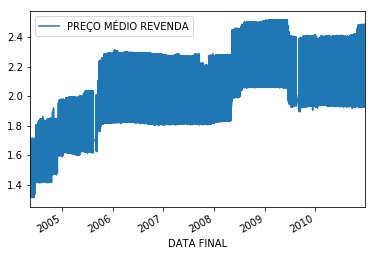

In [154]:
diesel_treino.plot(x='DATA FINAL', y='PREÇO MÉDIO REVENDA')

##### Para problemas de series temporais, a media e a varianca precisam ser estacionarias ( sejam constantes ao decorrer do tempo)
    Para transformar em series estacionarias, uma boa metodologia é tirando as diferenças dessa série.
    A ideia seguinte, foi segmentar a diferença do preço médio de revendar por estado, para evitar a oscilanção mostrada no gráfico anterior

In [155]:
def target_diff(x):
    return x.diff().shift(-1)

diesel_treino['DIFF PREÇO MÉDIO REVENDA'] = diesel_treino.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].apply(target_diff)

C:\Users\lucaskenjis\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


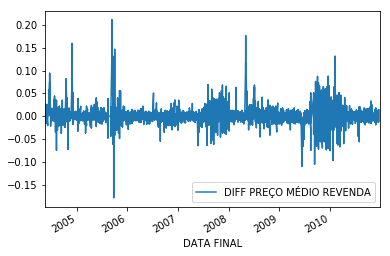

In [156]:
diesel_treino.plot(x='DATA FINAL', y='DIFF PREÇO MÉDIO REVENDA')

#### O modelo n pode prever algo que ele n viu ainda (pelo exemplo: se o modelo só entende que o diesel varia de 0 a 2, n tem como ele prever que o diesel possa atigir os 3 reais)

In [157]:
df_X_treino ['DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA'] = diesel_treino.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].apply(target_diff)
df_X_teste['DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA'] = diesel_teste.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].apply(target_diff)

### Sazonal

In [158]:
df_X_treino['MES'] = diesel_treino['DATA FINAL'].dt.month
df_X_treino['DIA'] = diesel_treino['DATA FINAL'].dt.day
#df_X_treino['DIA_DA_SEMANA'] = diesel_treino['DATA FINAL'].dt.weekday
df_X_treino['DIA_DO_ANO'] = diesel_treino['DATA FINAL'].dt.dayofyear
df_X_treino['SEMANA_DO_ANO'] = diesel_treino['DATA FINAL'].dt.weekofyear

df_X_teste['MES'] = diesel_teste['DATA FINAL'].dt.month
df_X_teste['DIA'] = diesel_teste['DATA FINAL'].dt.day
#df_X_teste['DIA_DA_SEMANA'] = diesel_teste['DATA FINAL'].dt.weekday
df_X_teste['DIA_DO_ANO'] = diesel_teste['DATA FINAL'].dt.dayofyear
df_X_teste['SEMANA_DO_ANO'] = diesel_teste['DATA FINAL'].dt.weekofyear

In [159]:
df_X_treino.head()

,ESTADO_,DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA,MES,DIA,DIA_DO_ANO,SEMANA_DO_ANO
43547,DISTRITO FEDERAL,0.013,5,15,136,20
43548,GOIAS,0.001,5,15,136,20
43549,MATO GROSSO,-0.003,5,15,136,20
43550,MATO GROSSO DO SUL,-0.002,5,15,136,20
43551,ALAGOAS,-0.003,5,15,136,20


### Lag
#### LAG = Yt-1

In [160]:
for l in range(0,12):
    df_X_treino['PRECO_MEDIO_REVENDA_ATUAL_{}'.format(l)] = diesel_treino['PREÇO MÉDIO REVENDA']
    df_X_teste['PRECO_MEDIO_REVENDA_ATUAL_{}'.format(l)] = diesel_teste['PREÇO MÉDIO REVENDA']

In [161]:
df_X_treino.head()

,ESTADO_,DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA,MES,DIA,DIA_DO_ANO,SEMANA_DO_ANO,PRECO_MEDIO_REVENDA_ATUAL_0,PRECO_MEDIO_REVENDA_ATUAL_1,PRECO_MEDIO_REVENDA_ATUAL_2,PRECO_MEDIO_REVENDA_ATUAL_3,PRECO_MEDIO_REVENDA_ATUAL_4,PRECO_MEDIO_REVENDA_ATUAL_5,PRECO_MEDIO_REVENDA_ATUAL_6,PRECO_MEDIO_REVENDA_ATUAL_7,PRECO_MEDIO_REVENDA_ATUAL_8,PRECO_MEDIO_REVENDA_ATUAL_9,PRECO_MEDIO_REVENDA_ATUAL_10,PRECO_MEDIO_REVENDA_ATUAL_11
43547,DISTRITO FEDERAL,0.013,5,15,136,20,1.447,1.447,1.447,1.447,1.447,1.447,1.447,1.447,1.447,1.447,1.447,1.447
43548,GOIAS,0.001,5,15,136,20,1.437,1.437,1.437,1.437,1.437,1.437,1.437,1.437,1.437,1.437,1.437,1.437
43549,MATO GROSSO,-0.003,5,15,136,20,1.600,1.600,1.600,1.600,1.600,1.600,1.600,1.600,1.600,1.600,1.600,1.600
43550,MATO GROSSO DO SUL,-0.002,5,15,136,20,1.526,1.526,1.526,1.526,1.526,1.526,1.526,1.526,1.526,1.526,1.526,1.526
43551,ALAGOAS,-0.003,5,15,136,20,1.362,1.362,1.362,1.362,1.362,1.362,1.362,1.362,1.362,1.362,1.362,1.362


In [162]:
df_X_treino.shape

(9233, 18)

### Diferença do Lag
#### Diff_LAG = Yt-1 - Yt-2 

In [163]:
for l in range(1,12):
    df_X_treino['DIFF_PRECO_MEDIO_REVENDA_ATUAL_{}'.format(l)] = diesel_treino.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].diff(l)
    df_X_teste['DIFF_PRECO_MEDIO_REVENDA_ATUAL_{}'.format(l)] = diesel_teste.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].diff(l)

In [164]:
df_X_treino.tail()

,ESTADO_,DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA,MES,DIA,DIA_DO_ANO,SEMANA_DO_ANO,PRECO_MEDIO_REVENDA_ATUAL_0,PRECO_MEDIO_REVENDA_ATUAL_1,PRECO_MEDIO_REVENDA_ATUAL_2,PRECO_MEDIO_REVENDA_ATUAL_3,PRECO_MEDIO_REVENDA_ATUAL_4,PRECO_MEDIO_REVENDA_ATUAL_5,PRECO_MEDIO_REVENDA_ATUAL_6,PRECO_MEDIO_REVENDA_ATUAL_7,PRECO_MEDIO_REVENDA_ATUAL_8,PRECO_MEDIO_REVENDA_ATUAL_9,PRECO_MEDIO_REVENDA_ATUAL_10,PRECO_MEDIO_REVENDA_ATUAL_11,DIFF_PRECO_MEDIO_REVENDA_ATUAL_1,DIFF_PRECO_MEDIO_REVENDA_ATUAL_2,DIFF_PRECO_MEDIO_REVENDA_ATUAL_3,DIFF_PRECO_MEDIO_REVENDA_ATUAL_4,DIFF_PRECO_MEDIO_REVENDA_ATUAL_5,DIFF_PRECO_MEDIO_REVENDA_ATUAL_6,DIFF_PRECO_MEDIO_REVENDA_ATUAL_7,DIFF_PRECO_MEDIO_REVENDA_ATUAL_8,DIFF_PRECO_MEDIO_REVENDA_ATUAL_9,DIFF_PRECO_MEDIO_REVENDA_ATUAL_10,DIFF_PRECO_MEDIO_REVENDA_ATUAL_11
52775,RIO DE JANEIRO,NaN,12,25,359,51,1.982,1.982,1.982,1.982,1.982,1.982,1.982,1.982,1.982,1.982,1.982,1.982,-0.004,0.006,-0.001,0.001,0.004,0.003,-0.002,0.006,-0.001,-0.001,-0.003
52776,SAO PAULO,NaN,12,25,359,51,1.963,1.963,1.963,1.963,1.963,1.963,1.963,1.963,1.963,1.963,1.963,1.963,-0.007,-0.001,-0.005,0.000,-0.006,-0.001,-0.004,-0.004,-0.004,0.001,-0.003
52777,PARANA,NaN,12,25,359,51,1.953,1.953,1.953,1.953,1.953,1.953,1.953,1.953,1.953,1.953,1.953,1.953,0.011,0.010,0.007,0.000,0.015,0.006,0.014,0.006,0.012,0.003,0.009
52778,RIO GRANDE DO SUL,NaN,12,25,359,51,2.051,2.051,2.051,2.051,2.051,2.051,2.051,2.051,2.051,2.051,2.051,2.051,0.000,0.000,0.000,-0.002,0.004,-0.002,-0.001,0.000,0.002,0.002,0.001
52779,SANTA CATARINA,NaN,12,25,359,51,2.023,2.023,2.023,2.023,2.023,2.023,2.023,2.023,2.023,2.023,2.023,2.023,0.002,0.004,0.002,0.006,0.001,-0.002,-0.003,-0.003,-0.004,0.000,-0.003


### Média Móvel
#### Média Móvel = (Yt-1 + Yt-2 + Yt-3 + Yt-4) / 4

##### Pega as 4 amostras e tira a media

In [165]:
roll = diesel_treino.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].rolling(4).mean()
roll.head()

ESTADO       
ACRE    43560       NaN
        43587       NaN
        43614       NaN
        43641    1.7165
        43668    1.7140
Name: PREÇO MÉDIO REVENDA, dtype: float64

##### Retira o index do groupby - sempre quis saber fazer isso

In [166]:
roll.reset_index(level=0, drop=True).head()

43560       NaN
43587       NaN
43614       NaN
43641    1.7165
43668    1.7140
Name: PREÇO MÉDIO REVENDA, dtype: float64

In [167]:
for l in range(2,12):
    df_X_treino['MEDIA_MOVEL_PRECO_MEDIO_REVENDA_{}_SEMANAS'.format(l)] = diesel_treino.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].rolling(l).mean().reset_index(level=0, drop=True)
    df_X_teste['MEDIA_MOVEL_PRECO_MEDIO_REVENDA_{}_SEMANAS'.format(l)] = diesel_teste.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].rolling(l).mean().reset_index(level=0, drop=True)

In [168]:
df_X_treino.tail()

,ESTADO_,DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA,MES,DIA,DIA_DO_ANO,SEMANA_DO_ANO,PRECO_MEDIO_REVENDA_ATUAL_0,PRECO_MEDIO_REVENDA_ATUAL_1,PRECO_MEDIO_REVENDA_ATUAL_2,PRECO_MEDIO_REVENDA_ATUAL_3,PRECO_MEDIO_REVENDA_ATUAL_4,PRECO_MEDIO_REVENDA_ATUAL_5,PRECO_MEDIO_REVENDA_ATUAL_6,PRECO_MEDIO_REVENDA_ATUAL_7,PRECO_MEDIO_REVENDA_ATUAL_8,...,DIFF_PRECO_MEDIO_REVENDA_ATUAL_7,DIFF_PRECO_MEDIO_REVENDA_ATUAL_8,DIFF_PRECO_MEDIO_REVENDA_ATUAL_9,DIFF_PRECO_MEDIO_REVENDA_ATUAL_10,DIFF_PRECO_MEDIO_REVENDA_ATUAL_11,MEDIA_MOVEL_PRECO_MEDIO_REVENDA_2_SEMANAS,MEDIA_MOVEL_PRECO_MEDIO_REVENDA_3_SEMANAS,MEDIA_MOVEL_PRECO_MEDIO_REVENDA_4_SEMANAS,MEDIA_MOVEL_PRECO_MEDIO_REVENDA_5_SEMANAS,MEDIA_MOVEL_PRECO_MEDIO_REVENDA_6_SEMANAS,MEDIA_MOVEL_PRECO_MEDIO_REVENDA_7_SEMANAS,MEDIA_MOVEL_PRECO_MEDIO_REVENDA_8_SEMANAS,MEDIA_MOVEL_PRECO_MEDIO_REVENDA_9_SEMANAS,MEDIA_MOVEL_PRECO_MEDIO_REVENDA_10_SEMANAS,MEDIA_MOVEL_PRECO_MEDIO_REVENDA_11_SEMANAS
52775,RIO DE JANEIRO,NaN,12,25,359,51,1.982,1.982,1.982,1.982,1.982,1.982,1.982,1.982,1.982,...,-0.002,0.006,-0.001,-0.001,-0.003,1.9840,1.981333,1.98175,1.9816,1.981000,1.980714,1.981125,1.980556,1.9808,1.981000
52776,SAO PAULO,NaN,12,25,359,51,1.963,1.963,1.963,1.963,1.963,1.963,1.963,1.963,1.963,...,-0.004,-0.004,-0.004,0.001,-0.003,1.9665,1.965667,1.96625,1.9656,1.966167,1.965857,1.966000,1.966111,1.9662,1.965818
52777,PARANA,NaN,12,25,359,51,1.953,1.953,1.953,1.953,1.953,1.953,1.953,1.953,1.953,...,0.014,0.006,0.012,0.003,0.009,1.9475,1.946000,1.94600,1.9474,1.945833,1.946000,1.945125,1.945333,1.9449,1.945364
52778,RIO GRANDE DO SUL,NaN,12,25,359,51,2.051,2.051,2.051,2.051,2.051,2.051,2.051,2.051,2.051,...,-0.001,0.000,0.002,0.002,0.001,2.0510,2.051000,2.05100,2.0514,2.050667,2.051000,2.051125,2.051111,2.0509,2.050727
52779,SANTA CATARINA,NaN,12,25,359,51,2.023,2.023,2.023,2.023,2.023,2.023,2.023,2.023,2.023,...,-0.003,-0.003,-0.004,0.000,-0.003,2.0220,2.021000,2.02100,2.0202,2.020500,2.021143,2.021750,2.022222,2.0227,2.022727


### Estado e Região

### One Hot

In [169]:
from category_encoders import OneHotEncoder

df_X_treino['ESTADO'] = diesel_treino['ESTADO']
df_X_treino['REGIÃO'] = diesel_treino['REGIÃO']

df_X_teste['ESTADO'] = diesel_teste['ESTADO']
df_X_teste['REGIÃO'] = diesel_teste['REGIÃO']

ohe_estado = OneHotEncoder(cols=['REGIÃO', 'ESTADO'], use_cat_names=True, drop_invariant=True)
df_X_treino = ohe_estado.fit_transform(df_X_treino)
df_X_teste = ohe_estado.transform(df_X_teste)
df_X_treino.head()

,ESTADO_,DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA,MES,DIA,DIA_DO_ANO,SEMANA_DO_ANO,PRECO_MEDIO_REVENDA_ATUAL_0,PRECO_MEDIO_REVENDA_ATUAL_1,PRECO_MEDIO_REVENDA_ATUAL_2,PRECO_MEDIO_REVENDA_ATUAL_3,PRECO_MEDIO_REVENDA_ATUAL_4,PRECO_MEDIO_REVENDA_ATUAL_5,PRECO_MEDIO_REVENDA_ATUAL_6,PRECO_MEDIO_REVENDA_ATUAL_7,PRECO_MEDIO_REVENDA_ATUAL_8,...,ESTADO_RONDONIA,ESTADO_RORAIMA,ESTADO_TOCANTINS,ESTADO_ESPIRITO SANTO,ESTADO_MINAS GERAIS,ESTADO_RIO DE JANEIRO,ESTADO_SAO PAULO,ESTADO_PARANA,ESTADO_RIO GRANDE DO SUL,ESTADO_SANTA CATARINA,REGIÃO_CENTRO OESTE,REGIÃO_NORDESTE,REGIÃO_NORTE,REGIÃO_SUDESTE,REGIÃO_SUL
43547,DISTRITO FEDERAL,0.013,5,15,136,20,1.447,1.447,1.447,1.447,1.447,1.447,1.447,1.447,1.447,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
43548,GOIAS,0.001,5,15,136,20,1.437,1.437,1.437,1.437,1.437,1.437,1.437,1.437,1.437,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
43549,MATO GROSSO,-0.003,5,15,136,20,1.600,1.600,1.600,1.600,1.600,1.600,1.600,1.600,1.600,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
43550,MATO GROSSO DO SUL,-0.002,5,15,136,20,1.526,1.526,1.526,1.526,1.526,1.526,1.526,1.526,1.526,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
43551,ALAGOAS,-0.003,5,15,136,20,1.362,1.362,1.362,1.362,1.362,1.362,1.362,1.362,1.362,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Preços em outros estados

In [170]:
df_X_treino['DATA FINAL'] = diesel_treino['DATA FINAL']
df_X_teste['DATA FINAL'] = diesel_teste['DATA FINAL']

preco_por_estado_treino = df_X_treino.pivot(index='DATA FINAL', columns='ESTADO_', values='DIFF_PRECO_MEDIO_REVENDA_ATUAL_1')
preco_por_estado_teste = df_X_teste.pivot(index='DATA FINAL', columns='ESTADO_', values='DIFF_PRECO_MEDIO_REVENDA_ATUAL_1')

preco_por_estado_treino.columns += "_DPRECO"
preco_por_estado_teste.columns += "_DPRECO"


df_X_treino = pd.merge(df_X_treino, preco_por_estado_treino, how='left', on='DATA FINAL')
df_X_teste = pd.merge(df_X_teste, preco_por_estado_teste, how='left', on='DATA FINAL')
df_X_treino.tail()

,ESTADO_,DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA,MES,DIA,DIA_DO_ANO,SEMANA_DO_ANO,PRECO_MEDIO_REVENDA_ATUAL_0,PRECO_MEDIO_REVENDA_ATUAL_1,PRECO_MEDIO_REVENDA_ATUAL_2,PRECO_MEDIO_REVENDA_ATUAL_3,PRECO_MEDIO_REVENDA_ATUAL_4,PRECO_MEDIO_REVENDA_ATUAL_5,PRECO_MEDIO_REVENDA_ATUAL_6,PRECO_MEDIO_REVENDA_ATUAL_7,PRECO_MEDIO_REVENDA_ATUAL_8,...,MINAS GERAIS_DPRECO,PARA_DPRECO,PARAIBA_DPRECO,PARANA_DPRECO,PERNAMBUCO_DPRECO,PIAUI_DPRECO,RIO DE JANEIRO_DPRECO,RIO GRANDE DO NORTE_DPRECO,RIO GRANDE DO SUL_DPRECO,RONDONIA_DPRECO,RORAIMA_DPRECO,SANTA CATARINA_DPRECO,SAO PAULO_DPRECO,SERGIPE_DPRECO,TOCANTINS_DPRECO
9228,RIO DE JANEIRO,NaN,12,25,359,51,1.982,1.982,1.982,1.982,1.982,1.982,1.982,1.982,1.982,...,0.002,-0.005,-0.005,0.011,0.006,-0.003,-0.004,-0.004,0.0,0.0,0.002,0.002,-0.007,0.015,0.002
9229,SAO PAULO,NaN,12,25,359,51,1.963,1.963,1.963,1.963,1.963,1.963,1.963,1.963,1.963,...,0.002,-0.005,-0.005,0.011,0.006,-0.003,-0.004,-0.004,0.0,0.0,0.002,0.002,-0.007,0.015,0.002
9230,PARANA,NaN,12,25,359,51,1.953,1.953,1.953,1.953,1.953,1.953,1.953,1.953,1.953,...,0.002,-0.005,-0.005,0.011,0.006,-0.003,-0.004,-0.004,0.0,0.0,0.002,0.002,-0.007,0.015,0.002
9231,RIO GRANDE DO SUL,NaN,12,25,359,51,2.051,2.051,2.051,2.051,2.051,2.051,2.051,2.051,2.051,...,0.002,-0.005,-0.005,0.011,0.006,-0.003,-0.004,-0.004,0.0,0.0,0.002,0.002,-0.007,0.015,0.002
9232,SANTA CATARINA,NaN,12,25,359,51,2.023,2.023,2.023,2.023,2.023,2.023,2.023,2.023,2.023,...,0.002,-0.005,-0.005,0.011,0.006,-0.003,-0.004,-0.004,0.0,0.0,0.002,0.002,-0.007,0.015,0.002


### Target encoding

In [171]:
from category_encoders import TargetEncoder

df_X_treino['TGTENC_ESTADO'] = df_X_treino['ESTADO_']
df_X_teste['TGTENC_ESTADO'] = df_X_teste['ESTADO_']

ohe_estado_tgt = TargetEncoder(cols=['TGTENC_ESTADO'], handle_unknown='error', min_samples_leaf=2)
df_X_treino = ohe_estado_tgt.fit_transform(df_X_treino, df_X_treino['DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA'].values)
df_X_teste = ohe_estado_tgt.transform(df_X_teste)

df_X_treino[['ESTADO_','TGTENC_ESTADO']].head()

,ESTADO_,TGTENC_ESTADO
0,DISTRITO FEDERAL,0.001651
1,GOIAS,0.001437
2,MATO GROSSO,0.001821
3,MATO GROSSO DO SUL,0.001833
4,ALAGOAS,0.001812


### Ranking Preços por Estado

In [172]:
df_X_treino['RANKING_PRECO_SEMANAL'] = df_X_treino.groupby("DATA FINAL")['DIFF_PRECO_MEDIO_REVENDA_ATUAL_1'].rank()
df_X_teste['RANKING_PRECO_SEMANAL'] = df_X_teste.groupby("DATA FINAL")['DIFF_PRECO_MEDIO_REVENDA_ATUAL_1'].rank()
df_X_treino[['DATA FINAL', 'ESTADO_','RANKING_PRECO_SEMANAL']].tail()

,DATA FINAL,ESTADO_,RANKING_PRECO_SEMANAL
9228,2010-12-25,RIO DE JANEIRO,5.5
9229,2010-12-25,SAO PAULO,2.0
9230,2010-12-25,PARANA,26.0
9231,2010-12-25,RIO GRANDE DO SUL,14.5
9232,2010-12-25,SANTA CATARINA,22.5


In [173]:
df_X_treino = df_X_treino.drop(["DATA FINAL", 'ESTADO_'], axis=1)
df_X_teste = df_X_teste.drop(["DATA FINAL", 'ESTADO_'], axis=1)

### Aprimorando a Baseline

In [174]:
print("BASELINE 1", np.sqrt(mean_squared_log_error(df_X_teste['PRECO_MEDIO_REVENDA_ATUAL_0'] + df_X_teste['DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA'].fillna(0) , 
                                                   df_X_teste['PRECO_MEDIO_REVENDA_ATUAL_0'])) * 100)

BASELINE 1 0.8124454147383392


In [175]:
df_X_treino = df_X_treino.dropna()
df_X_teste = df_X_teste.dropna()

In [176]:
Xtr, ytr = df_X_treino.drop(['DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA'], axis=1), df_X_treino['DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA']
Xval, yval = df_X_teste.drop(['DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA'], axis=1), df_X_teste['DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA']
yval_final = Xval['PRECO_MEDIO_REVENDA_ATUAL_0'] + yval

p_base1 = Xval['PRECO_MEDIO_REVENDA_ATUAL_0']
print("BASELINE 1", np.sqrt(mean_squared_log_error(yval_final, p_base1)) * 100)

p_base2 = Xval['PRECO_MEDIO_REVENDA_ATUAL_0'] + ytr.mean()
print("BASELINE 2", np.sqrt(mean_squared_log_error(yval_final, p_base2)) * 100)

BASELINE 1 0.8225030098725331
BASELINE 2 0.8185573612115271


### Tudo certo?

In [177]:
df_X_treino.describe()

,DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA,MES,DIA,DIA_DO_ANO,SEMANA_DO_ANO,PRECO_MEDIO_REVENDA_ATUAL_0,PRECO_MEDIO_REVENDA_ATUAL_1,PRECO_MEDIO_REVENDA_ATUAL_2,PRECO_MEDIO_REVENDA_ATUAL_3,PRECO_MEDIO_REVENDA_ATUAL_4,PRECO_MEDIO_REVENDA_ATUAL_5,PRECO_MEDIO_REVENDA_ATUAL_6,PRECO_MEDIO_REVENDA_ATUAL_7,PRECO_MEDIO_REVENDA_ATUAL_8,PRECO_MEDIO_REVENDA_ATUAL_9,...,PARAIBA_DPRECO,PARANA_DPRECO,PERNAMBUCO_DPRECO,PIAUI_DPRECO,RIO DE JANEIRO_DPRECO,RIO GRANDE DO NORTE_DPRECO,RIO GRANDE DO SUL_DPRECO,RONDONIA_DPRECO,RORAIMA_DPRECO,SANTA CATARINA_DPRECO,SAO PAULO_DPRECO,SERGIPE_DPRECO,TOCANTINS_DPRECO,TGTENC_ESTADO,RANKING_PRECO_SEMANAL
count,8883.000000,8883.000000,8883.000000,8883.000000,8883.000000,8883.000000,8883.000000,8883.000000,8883.000000,8883.000000,8883.000000,8883.000000,8883.000000,8883.000000,8883.000000,...,8883.000000,8883.000000,8883.000000,8883.000000,8883.000000,8883.000000,8883.000000,8883.000000,8883.000000,8883.000000,8883.000000,8883.000000,8883.000000,8883.000000,8883.000000
mean,0.001543,6.702128,15.665653,188.516717,27.379939,1.954788,1.954788,1.954788,1.954788,1.954788,1.954788,1.954788,1.954788,1.954788,1.954788,...,0.001705,0.001389,0.001632,0.001666,0.001574,0.001584,0.001462,0.001468,0.002085,0.001550,0.001502,0.001590,0.001462,0.001826,14.000000
std,0.017717,3.471663,8.790379,105.985894,15.159940,0.200248,0.200248,0.200248,0.200248,0.200248,0.200248,0.200248,0.200248,0.200248,0.200248,...,0.013796,0.016394,0.014259,0.017673,0.014490,0.018936,0.016830,0.018475,0.018182,0.014418,0.015364,0.019922,0.019716,0.000209,7.758435
min,-0.177000,1.000000,1.000000,1.000000,1.000000,1.415000,1.415000,1.415000,1.415000,1.415000,1.415000,1.415000,1.415000,1.415000,1.415000,...,-0.046000,-0.072000,-0.046000,-0.066000,-0.042000,-0.078000,-0.072000,-0.096000,-0.054000,-0.052000,-0.046000,-0.055000,-0.087000,0.001243,1.000000
25%,-0.003000,4.000000,8.000000,97.000000,14.000000,1.842000,1.842000,1.842000,1.842000,1.842000,1.842000,1.842000,1.842000,1.842000,1.842000,...,-0.002000,-0.003000,-0.002000,-0.004000,-0.002000,-0.003000,-0.002000,-0.005000,-0.002000,-0.002000,-0.001000,-0.005000,-0.003000,0.001739,7.500000
50%,0.000000,7.000000,16.000000,192.000000,28.000000,1.952000,1.952000,1.952000,1.952000,1.952000,1.952000,1.952000,1.952000,1.952000,1.952000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001812,14.000000
75%,0.003000,10.000000,23.000000,282.000000,41.000000,2.078000,2.078000,2.078000,2.078000,2.078000,2.078000,2.078000,2.078000,2.078000,2.078000,...,0.003000,0.003000,0.002000,0.004000,0.003000,0.003000,0.002000,0.005000,0.002000,0.003000,0.001000,0.006000,0.004000,0.001891,20.500000
max,0.211000,12.000000,31.000000,365.000000,53.000000,2.521000,2.521000,2.521000,2.521000,2.521000,2.521000,2.521000,2.521000,2.521000,2.521000,...,0.124000,0.181000,0.151000,0.191000,0.159000,0.204000,0.173000,0.168000,0.171000,0.160000,0.175000,0.194000,0.200000,0.002346,27.000000


In [178]:
df_X_teste.describe()

,DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA,MES,DIA,DIA_DO_ANO,SEMANA_DO_ANO,PRECO_MEDIO_REVENDA_ATUAL_0,PRECO_MEDIO_REVENDA_ATUAL_1,PRECO_MEDIO_REVENDA_ATUAL_2,PRECO_MEDIO_REVENDA_ATUAL_3,PRECO_MEDIO_REVENDA_ATUAL_4,PRECO_MEDIO_REVENDA_ATUAL_5,PRECO_MEDIO_REVENDA_ATUAL_6,PRECO_MEDIO_REVENDA_ATUAL_7,PRECO_MEDIO_REVENDA_ATUAL_8,PRECO_MEDIO_REVENDA_ATUAL_9,...,PARAIBA_DPRECO,PARANA_DPRECO,PERNAMBUCO_DPRECO,PIAUI_DPRECO,RIO DE JANEIRO_DPRECO,RIO GRANDE DO NORTE_DPRECO,RIO GRANDE DO SUL_DPRECO,RONDONIA_DPRECO,RORAIMA_DPRECO,SANTA CATARINA_DPRECO,SAO PAULO_DPRECO,SERGIPE_DPRECO,TOCANTINS_DPRECO,TGTENC_ESTADO,RANKING_PRECO_SEMANAL
count,11637.000000,11637.000000,11637.000000,11637.000000,11637.00000,11637.000000,11637.000000,11637.000000,11637.000000,11637.000000,11637.000000,11637.000000,11637.000000,11637.000000,11637.000000,...,11637.000000,11637.000000,11637.000000,11637.000000,11637.000000,11637.000000,11637.000000,11637.000000,11637.000000,11637.000000,11637.000000,11637.000000,11637.000000,11637.000000,11637.000000
mean,0.003739,6.484919,15.696056,181.907193,26.24826,2.810814,2.810814,2.810814,2.810814,2.810814,2.810814,2.810814,2.810814,2.810814,2.810814,...,0.003807,0.003237,0.003993,0.003819,0.003664,0.003974,0.003415,0.003784,0.002877,0.003455,0.003443,0.003754,0.003682,0.001826,14.000000
std,0.035355,3.417603,8.805458,104.412844,14.90065,0.563771,0.563771,0.563771,0.563771,0.563771,0.563771,0.563771,0.563771,0.563771,0.563771,...,0.026477,0.030562,0.031428,0.032100,0.030638,0.036796,0.035384,0.030481,0.038506,0.029872,0.031827,0.037051,0.035451,0.000209,7.775183
min,-0.538000,1.000000,1.000000,2.000000,1.00000,1.936000,1.936000,1.936000,1.936000,1.936000,1.936000,1.936000,1.936000,1.936000,1.936000,...,-0.227000,-0.365000,-0.202000,-0.293000,-0.381000,-0.360000,-0.397000,-0.352000,-0.326000,-0.362000,-0.400000,-0.453000,-0.329000,0.001243,1.000000
25%,-0.005000,4.000000,8.000000,93.000000,14.00000,2.302000,2.302000,2.302000,2.302000,2.302000,2.302000,2.302000,2.302000,2.302000,2.302000,...,-0.004000,-0.005000,-0.003000,-0.003000,-0.006000,-0.006000,-0.005000,-0.004000,-0.005000,-0.005000,-0.004000,-0.005000,-0.004000,0.001739,7.000000
50%,0.001000,6.000000,16.000000,177.000000,26.00000,2.813000,2.813000,2.813000,2.813000,2.813000,2.813000,2.813000,2.813000,2.813000,2.813000,...,0.001000,0.001000,0.001000,0.000000,0.002000,0.002000,0.000000,0.000000,0.000000,0.001000,0.001000,0.000000,0.001000,0.001812,14.000000
75%,0.008000,9.000000,23.000000,273.000000,39.00000,3.248000,3.248000,3.248000,3.248000,3.248000,3.248000,3.248000,3.248000,3.248000,3.248000,...,0.008000,0.006000,0.006000,0.006000,0.010000,0.011000,0.006000,0.008000,0.006000,0.008000,0.007000,0.010000,0.009000,0.001891,21.000000
max,0.364000,12.000000,31.000000,366.000000,53.00000,4.774000,4.774000,4.774000,4.774000,4.774000,4.774000,4.774000,4.774000,4.774000,4.774000,...,0.162000,0.203000,0.278000,0.218000,0.140000,0.158000,0.211000,0.178000,0.322000,0.191000,0.182000,0.173000,0.277000,0.002346,27.000000


### Random Forest

Populating the interactive namespace from numpy and matplotlib


C:\Users\lucaskenjis\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['roll']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


ERRO 0.8063151060534034


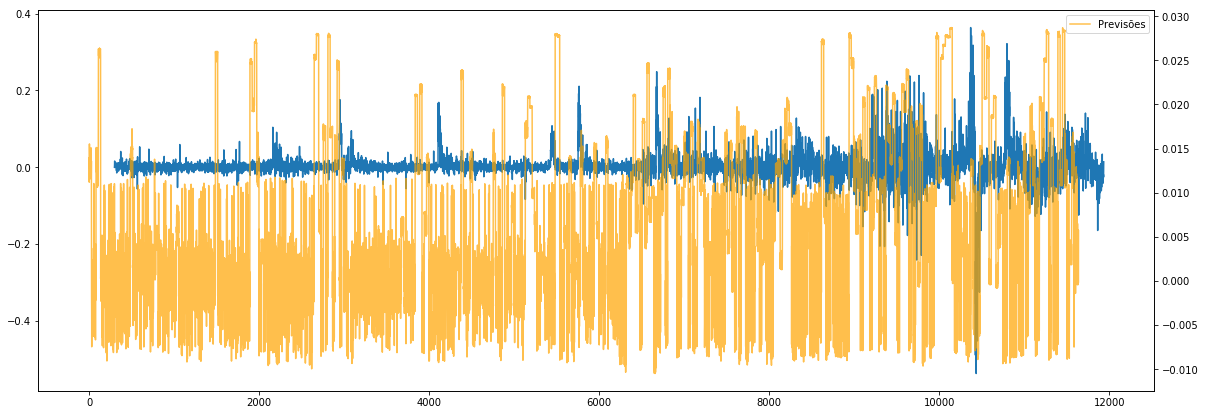

In [179]:
from sklearn.ensemble import RandomForestRegressor
%pylab inline

mdl = RandomForestRegressor(n_jobs=-1, random_state=0, n_estimators=1000, min_samples_leaf=128, max_features='auto') 
#min samples leaf é usado pra diminuir a possibilidade overfit, quanto menor o valor, mais especifico fica a construcao do
# do modelo, aumentando a possibilidade de overfit
mdl.fit(Xtr, ytr)
p = mdl.predict(Xval)
p_final = Xval['PRECO_MEDIO_REVENDA_ATUAL_0'] + p

print('ERRO', np.sqrt(mean_squared_log_error(yval_final, p_final)) * 100)

fig, ax = pylab.subplots(1,1, figsize=(20,7))
ax.plot(yval, label = 'Y')
axt = ax.twinx()
axt.plot(p, color = 'orange', alpha = 0.7, label='Previsões')
axt.legend()

### Ridge

ERRO 0.8206282697173202


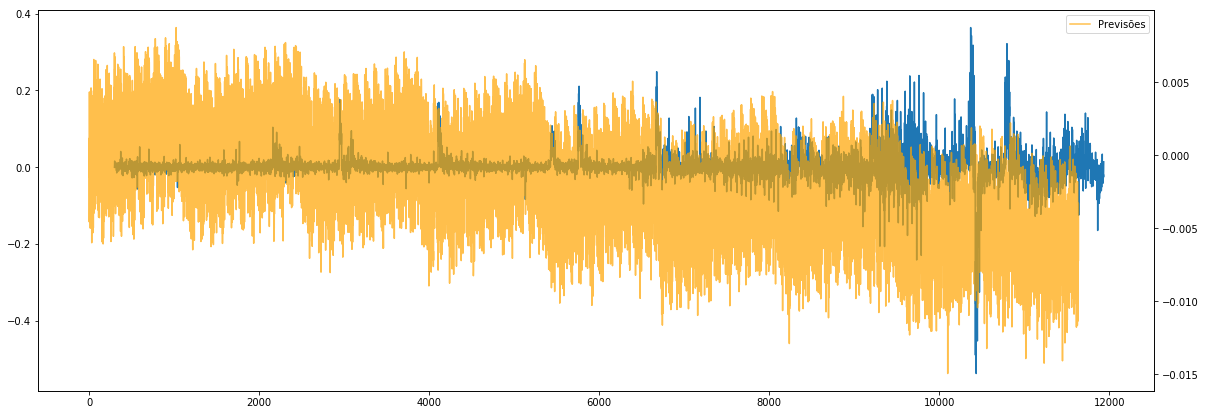

In [131]:
from sklearn.linear_model import Ridge
mdl = Ridge(random_state=0, alpha=10000.)
mdl.fit(Xtr, ytr)
p = mdl.predict(Xval)
p_final = Xval['PRECO_MEDIO_REVENDA_ATUAL_0'] + p

np.sqrt(mean_squared_log_error(yval_final, p_final)) * 100


print('ERRO', np.sqrt(mean_squared_log_error(yval_final, p_final)) * 100)
fig, ax = pylab.subplots(1,1, figsize=(20,7))
ax.plot(yval, label = 'Y')
axt = ax.twinx()
axt.plot(p, color = 'orange', alpha = 0.7, label='Previsões')
axt.legend()

### LightGBM

In [198]:
import re

In [205]:
Xtr.columns

Index(['MES', 'DIA', 'DIA_DO_ANO', 'SEMANA_DO_ANO',
       'PRECO_MEDIO_REVENDA_ATUAL_0', 'PRECO_MEDIO_REVENDA_ATUAL_1',
       'PRECO_MEDIO_REVENDA_ATUAL_2', 'PRECO_MEDIO_REVENDA_ATUAL_3',
       'PRECO_MEDIO_REVENDA_ATUAL_4', 'PRECO_MEDIO_REVENDA_ATUAL_5',
       'PRECO_MEDIO_REVENDA_ATUAL_6', 'PRECO_MEDIO_REVENDA_ATUAL_7',
       'PRECO_MEDIO_REVENDA_ATUAL_8', 'PRECO_MEDIO_REVENDA_ATUAL_9',
       'PRECO_MEDIO_REVENDA_ATUAL_10', 'PRECO_MEDIO_REVENDA_ATUAL_11',
       'DIFF_PRECO_MEDIO_REVENDA_ATUAL_1', 'DIFF_PRECO_MEDIO_REVENDA_ATUAL_2',
       'DIFF_PRECO_MEDIO_REVENDA_ATUAL_3', 'DIFF_PRECO_MEDIO_REVENDA_ATUAL_4',
       'DIFF_PRECO_MEDIO_REVENDA_ATUAL_5', 'DIFF_PRECO_MEDIO_REVENDA_ATUAL_6',
       'DIFF_PRECO_MEDIO_REVENDA_ATUAL_7', 'DIFF_PRECO_MEDIO_REVENDA_ATUAL_8',
       'DIFF_PRECO_MEDIO_REVENDA_ATUAL_9', 'DIFF_PRECO_MEDIO_REVENDA_ATUAL_10',
       'DIFF_PRECO_MEDIO_REVENDA_ATUAL_11',
       'MEDIA_MOVEL_PRECO_MEDIO_REVENDA_2_SEMANAS',
       'MEDIA_MOVEL_PRECO_MEDIO_REVENDA_

In [203]:
Xtr.columns = Xtr.columns.str.replace(' ','_')
Xval.columns = Xval.columns.str.replace(' ','_')

In [208]:
from lightgbm import LGBMRegressor
mdl = LGBMRegressor(n_jobs=-1, random_state=0, n_estimators=100, learning_rate=0.001, num_leaves=2**6, subsample=0.9, subsample_freq=1,
                       colsample_bytree=1.)
mdl.fit(Xtr, ytr)
p = mdl.predict(Xval)
p_final = Xval['PRECO_MEDIO_REVENDA_ATUAL_0'] + p

print("ERRO", np.sqrt(mean_squared_log_error(yval_final, p_final)) * 100)

fig, ax = pylab.subplots(1,1, figsize=(20,7))
ax.plot(yval, label = 'Y')
axt = ax.twinx()
axt.plot(p, color = 'orange', alpha = 0.7, label='Previsões')
axt.legend()

LightGBMError: Do not support non-ASCII characters in feature name.

C:\Users\lucaskenjis\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\lucaskenjis\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[19:37:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
ERRO 7.85631740463804


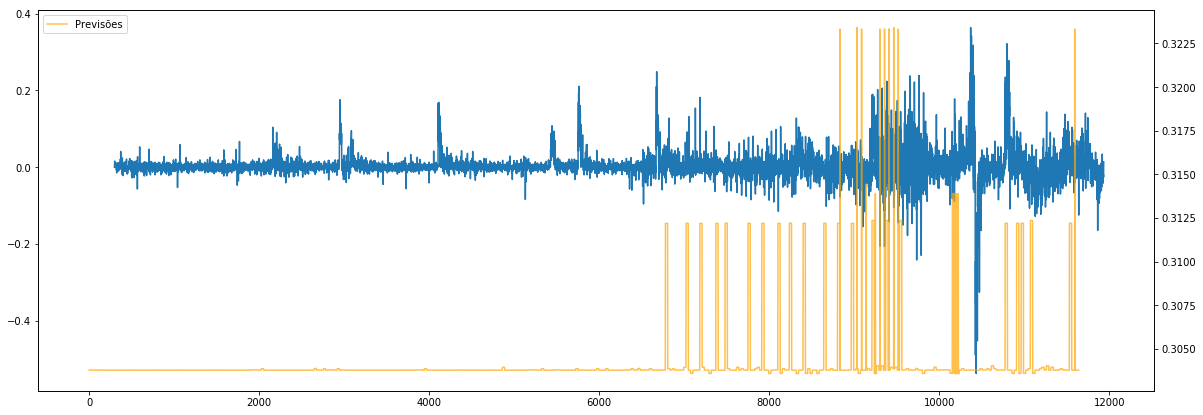

In [209]:
from xgboost.sklearn import XGBRegressor

mdl = XGBRegressor(n_jobs=-1, random_state=0, n_estimators=500, learning_rate=0.001, num_leaves=2**6, subsample=0.9, subsample_freq=1,
                       colsample_bytree=1.)
mdl.fit(Xtr, ytr)
p = mdl.predict(Xval)
p_final = Xval['PRECO_MEDIO_REVENDA_ATUAL_0'] + p

print("ERRO", np.sqrt(mean_squared_log_error(yval_final, p_final)) * 100)

fig, ax = pylab.subplots(1,1, figsize=(20,7))
ax.plot(yval, label = 'Y')
axt = ax.twinx()
axt.plot(p, color = 'orange', alpha = 0.7, label='Previsões')
axt.legend()

##### Como da pra ver, o modelo criado foi pior que a baseline. Pra tentar reverter o resultado, podemos utilizar a tecnica de seleção de features.

### Sequential Forward Feature Selection

In [211]:
aceitas = []
valor_menor_erro= 10000

for step in range(20):
    var_menor_erro = None
    for var in Xtr.columns:
        if var in aceitas:
            continue
        mdl = RandomForestRegressor(n_jobs=-1, random_state=0, n_estimators=500)
        mdl.fit(Xtr[aceitas+[var]], ytr)
        p = mdl.predict(Xval[aceitas+[var]])

        p_final = Xval['PRECO_MEDIO_REVENDA_ATUAL_0'] + p
        yval_final = Xval['PRECO_MEDIO_REVENDA_ATUAL_0'] + yval

        erro = np.sqrt(mean_squared_log_error(yval_final, p_final)) * 100

        print("Variável: {} - Erro: {:.4f}\n".format(var, erro))

        if erro < valor_menor_erro:
            var_menor_erro = var
            valor_menor_erro = erro
    if var_menor_erro is None:
        break
    aceitas.append(var_menor_erro)
        
    print("Melhor Variável: {} - Erro: {:.4f}\n".format(var_menor_erro, valor_menor_erro))
    #print(aceitas)
    print()

Variável: MES - Erro: 0.8132

Variável: DIA - Erro: 0.8274

Variável: DIA_DO_ANO - Erro: 0.9056

Variável: SEMANA_DO_ANO - Erro: 0.8233

Variável: PRECO_MEDIO_REVENDA_ATUAL_0 - Erro: 0.8335

Variável: PRECO_MEDIO_REVENDA_ATUAL_1 - Erro: 0.8335

Variável: PRECO_MEDIO_REVENDA_ATUAL_2 - Erro: 0.8335

Variável: PRECO_MEDIO_REVENDA_ATUAL_3 - Erro: 0.8335

Variável: PRECO_MEDIO_REVENDA_ATUAL_4 - Erro: 0.8335

Variável: PRECO_MEDIO_REVENDA_ATUAL_5 - Erro: 0.8335

Variável: PRECO_MEDIO_REVENDA_ATUAL_6 - Erro: 0.8335

Variável: PRECO_MEDIO_REVENDA_ATUAL_7 - Erro: 0.8335

Variável: PRECO_MEDIO_REVENDA_ATUAL_8 - Erro: 0.8335

Variável: PRECO_MEDIO_REVENDA_ATUAL_9 - Erro: 0.8335

Variável: PRECO_MEDIO_REVENDA_ATUAL_10 - Erro: 0.8335

Variável: PRECO_MEDIO_REVENDA_ATUAL_11 - Erro: 0.8335

Variável: DIFF_PRECO_MEDIO_REVENDA_ATUAL_1 - Erro: 0.8454

Variável: DIFF_PRECO_MEDIO_REVENDA_ATUAL_2 - Erro: 0.8597

Variável: DIFF_PRECO_MEDIO_REVENDA_ATUAL_3 - Erro: 0.8415

Variável: DIFF_PRECO_MEDIO_REVENDA_A

Variável: REGIÃO_NORTE - Erro: 0.8075

Variável: REGIÃO_SUDESTE - Erro: 0.8070

Variável: REGIÃO_SUL - Erro: 0.8069

Variável: ACRE_DPRECO - Erro: 0.8338

Variável: ALAGOAS_DPRECO - Erro: 1.1299

Variável: AMAPA_DPRECO - Erro: 0.8317

Variável: AMAZONAS_DPRECO - Erro: 0.8201

Variável: BAHIA_DPRECO - Erro: 0.8310

Variável: CEARA_DPRECO - Erro: 0.8439

Variável: DISTRITO_FEDERAL_DPRECO - Erro: 0.8345

Variável: ESPIRITO_SANTO_DPRECO - Erro: 0.8186

Variável: GOIAS_DPRECO - Erro: 0.8304

Variável: MARANHAO_DPRECO - Erro: 0.8695

Variável: MATO_GROSSO_DPRECO - Erro: 0.8535

Variável: MATO_GROSSO_DO_SUL_DPRECO - Erro: 0.8469

Variável: MINAS_GERAIS_DPRECO - Erro: 0.8079

Variável: PARA_DPRECO - Erro: 0.8637

Variável: PARAIBA_DPRECO - Erro: 0.8599

Variável: PARANA_DPRECO - Erro: 0.8220

Variável: PERNAMBUCO_DPRECO - Erro: 0.8600

Variável: PIAUI_DPRECO - Erro: 0.8426

Variável: RIO_DE_JANEIRO_DPRECO - Erro: 0.8282

Variável: RIO_GRANDE_DO_NORTE_DPRECO - Erro: 0.8345

Variável: RIO_GRANDE

In [212]:
aceitas

['RANKING_PRECO_SEMANAL']